# Battle Of Neighbourhoods-Mumbai 

Opening a New Restaurant in Mumbai

1. Build a dataframe of neighborhoods in Mumbai by web scraping the data from Wikipedia page
2. Get the geographical coordinates of the neighborhoods
3. Obtain the venue data for the neighborhoods from Foursquare API
4. Explore and cluster the neighborhoods
5. Select the best cluster to open a new shopping mall

In [1]:
import pandas as pd
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as color

In [2]:
from bs4 import BeautifulSoup# library to parse HTML and XML documents
import requests#library to handle requests

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [5]:
# send the GET request
source = requests.get("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai").text
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(source, 'lxml')

In [6]:
table = soup.find("table")
table_rows = table.tbody.find_all("tr")

In [7]:
table_rows

[<tr>
 <th>Area
 </th>
 <th>Location
 </th>
 <th>Latitude
 </th>
 <th>Longitude
 </th></tr>, <tr>
 <td>Amboli
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.1293
 </td>
 <td>72.8434
 </td></tr>, <tr>
 <td>Chakala, Andheri
 </td>
 <td>Western Suburbs
 </td>
 <td>19.111388
 </td>
 <td>72.860833
 </td></tr>, <tr>
 <td>D.N. Nagar
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.124085
 </td>
 <td>72.831373
 </td></tr>, <tr>
 <td>Four Bungalows
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.124714
 </td>
 <td>72.82721
 </td></tr>, <tr>
 <td>Lokhandwala
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.130815
 </td>
 <td>72.82927
 </td></tr>, <tr>
 <td>Marol
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.119219
 </td>
 <td>72.882743
 </td></tr>, <tr>
 <td>Sahar
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.098889
 </td>
 <td>72.867222
 </td></tr>, <tr>
 <td>Seven Bungalows
 </td>
 <td>Andheri,Western Suburbs
 </td>
 <td>19.129052
 </td>
 <td>72.817018
 </td></tr>, <tr>
 <

In [8]:
Ttd=table.find_all('td')
Ttd

[<td>Amboli
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.1293
 </td>, <td>72.8434
 </td>, <td>Chakala, Andheri
 </td>, <td>Western Suburbs
 </td>, <td>19.111388
 </td>, <td>72.860833
 </td>, <td>D.N. Nagar
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.124085
 </td>, <td>72.831373
 </td>, <td>Four Bungalows
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.124714
 </td>, <td>72.82721
 </td>, <td>Lokhandwala
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.130815
 </td>, <td>72.82927
 </td>, <td>Marol
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.119219
 </td>, <td>72.882743
 </td>, <td>Sahar
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.098889
 </td>, <td>72.867222
 </td>, <td>Seven Bungalows
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.129052
 </td>, <td>72.817018
 </td>, <td>Versova
 </td>, <td>Andheri,Western Suburbs
 </td>, <td>19.12
 </td>, <td>72.82
 </td>, <td>Mira Road
 </td>, <td>Mira-Bhayandar,Western Suburbs
 </td>, <td>19.284167
 </td>, <td>72.8

In [9]:
print(table.tr.text)


Area

Location

Latitude

Longitude



## Build a dataframe of neighborhoods in Mumbai by web scraping the data from Wikipedia page

In [10]:
Area=[]
Location=[]
lat=[]
long=[]
for i in range(0,len(Ttd),4):
    Area.append(Ttd[i].text.strip())
    Location.append(Ttd[i+1].text.strip())
    lat.append(Ttd[i+2].text.strip())
    long.append(Ttd[i+3].text.strip())

Mdf=pd.DataFrame(data=[Area,Location,lat,long])
Mdf=Mdf.transpose()
Mdf.columns =['Neighbourhood','Location','Latitude','Longtitude']
Mdf.head()

,Neighbourhood,Location,Latitude,Longtitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927


In [11]:
Mdf.drop(['Location'],1,inplace=True)

In [12]:
Mdf.head()

,Neighbourhood,Latitude,Longtitude
0,Amboli,19.1293,72.8434
1,"Chakala, Andheri",19.111388,72.860833
2,D.N. Nagar,19.124085,72.831373
3,Four Bungalows,19.124714,72.82721
4,Lokhandwala,19.130815,72.82927


In [13]:
# print the number of rows of the dataframe
Mdf.shape

(93, 3)

In [14]:
!conda install -c conda-forge geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Get the geographical coordinates

In [15]:
# define a function to get coordinates
def get_latlng(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [16]:
import geocoder
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighbourhood) for neighbourhood in Mdf["Neighbourhood"].tolist() ]

In [17]:
coords

[[19.129060000000038, 72.84644000000003],
 [19.10836000000006, 72.86233000000004],
 [19.125050000000044, 72.83248000000003],
 [19.126320000000078, 72.82433000000003],
 [19.143160000000023, 72.82487000000003],
 [19.119050000000072, 72.88281000000006],
 [19.102653756130806, 72.86258033819921],
 [19.13146001712022, 72.81645999886862],
 [19.137690000000077, 72.81348000000008],
 [19.26570462175641, 72.8706928508165],
 [19.307430000000068, 72.85184000000004],
 [26.866340000000037, 80.93884000000008],
 [19.04582000000005, 72.81948000000006],
 [19.059520000000077, 72.84551000000005],
 [19.067720000000065, 72.82524000000006],
 [19.24917000000005, 72.85023000000007],
 [19.240850000000023, 72.78411000000006],
 [19.250030000000038, 72.85907000000003],
 [19.166149990244833, 72.85940996038701],
 [19.167850000000044, 72.83292000000006],
 [19.14116000000007, 72.84332000000006],
 [19.014920000000075, 72.84522000000004],
 [19.208660000000066, 72.82612000000006],
 [19.211550000000045, 72.85272000000003],

In [18]:
#Drop Latitude Longtitude columns in dataframe
Mdf.drop(['Latitude','Longtitude'],1,inplace=True)

In [19]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [20]:
# merge the coordinates into the original dataframe
Mdf['Latitude'] = df_coords['Latitude']
Mdf['Longitude'] = df_coords['Longitude']

In [21]:
# check the neighborhoods and the coordinates
#Mumbai dataset 
Mdf

,Neighbourhood,Latitude,Longitude
0,Amboli,19.129060,72.846440
1,"Chakala, Andheri",19.108360,72.862330
2,D.N. Nagar,19.125050,72.832480
3,Four Bungalows,19.126320,72.824330
4,Lokhandwala,19.143160,72.824870
5,Marol,19.119050,72.882810
6,Sahar,19.102654,72.862580
7,Seven Bungalows,19.131460,72.816460
8,Versova,19.137690,72.813480
9,Mira Road,19.265705,72.870693


## Create a map of Mumbai with neighborhoods superimposed on top

In [22]:
address = 'Seven Bungalows,Mumbai'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seven Bungalows,Mumbai {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seven Bungalows,Mumbai 19.1297617, 72.8213781.


In [23]:
# create map of Mumbai using latitude and longitude values
map_m = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Mdf['Latitude'], Mdf['Longitude'], Mdf['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_m)  
    
map_m

## Use the Foursquare API to explore the neighborhoods

In [52]:
CLIENT_ID = 'D5KEKFMMQMXTMOEFE2QEO4O0VJACVBKTF0B4NGI1KRX121BO' # your Foursquare ID
CLIENT_SECRET = '4MJI4KE33ZCYAU3W2DPOS2044POVITE1HJN5PBIDU2S3RGYT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D5KEKFMMQMXTMOEFE2QEO4O0VJACVBKTF0B4NGI1KRX121BO
CLIENT_SECRET:4MJI4KE33ZCYAU3W2DPOS2044POVITE1HJN5PBIDU2S3RGYT


### Now, let's get the top 100 venues that are within a radius of 2000 meters.

In [53]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(Mdf['Latitude'], Mdf['Longitude'], Mdf['Neighbourhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [54]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(7625, 7)


,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,19.12906,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,19.12906,72.84644,Merwans Cake shop,19.119300,72.845418,Bakery
2,Amboli,19.12906,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
3,Amboli,19.12906,72.84644,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
4,Amboli,19.12906,72.84644,Hard Rock Cafe Andheri,19.135995,72.835335,American Restaurant


### Let's check how many venues were returned for each neighorhood

In [55]:
venues_df.groupby(["Neighbourhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighbourhood,,,,,,
Aarey Milk Colony,77,77,77,77,77,77
Agripada,77,77,77,77,77,77
Altamount Road,96,96,96,96,96,96
Amboli,70,70,70,70,70,70
Amrut Nagar,92,92,92,92,92,92
Asalfa,100,100,100,100,100,100
Ballard Estate,100,100,100,100,100,100
Bandstand Promenade,100,100,100,100,100,100
Bangur Nagar,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [56]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 230 uniques categories.


In [57]:
# print out the list of Venuecategories
venues_df['VenueCategory'].unique()[:50]

array(['Chinese Restaurant', 'Bakery', 'Mughlai Restaurant',
       'Falafel Restaurant', 'American Restaurant', 'Pizza Place',
       'Sandwich Place', 'Brewery', 'Ice Cream Shop', 'Pub',
       'Indian Restaurant', 'Multiplex', 'BBQ Joint', 'Lounge', 'Diner',
       'Coffee Shop', "Women's Store", 'Jewelry Store',
       'Fast Food Restaurant', 'Bar', 'Café', 'Dessert Shop',
       'Residential Building (Apartment / Condo)', 'Italian Restaurant',
       'Vegetarian / Vegan Restaurant', 'College Gym', 'Hotel',
       'Sports Bar', 'Camera Store', 'Shopping Mall', 'Boutique',
       'Electronics Store', 'Restaurant', 'Asian Restaurant',
       'Seafood Restaurant', 'Snack Place', 'Airport Service', 'Spa',
       'Bagel Shop', 'Maharashtrian Restaurant', 'Juice Bar', 'Nightclub',
       'Food Truck', 'Airport', 'Airport Lounge', 'Resort', 'Beer Garden',
       'Pool', 'Donut Shop', 'Tea Room'], dtype=object)

In [58]:
# print out the list of Venuenames
venues_df['VenueName'].unique()[:50]

array(['5 Spice , Bandra', 'Merwans Cake shop',
       "Jaffer Bhai's Delhi Darbar", 'Shawarma Factory',
       'Hard Rock Cafe Andheri', 'Pizza Express', 'Narayan Sandwich',
       'Mainland China', 'Doolally Taproom', "Joey's Pizza",
       'Natural icecream At Jogeshwari west', 'The Little Door',
       'Persia Darbar', 'Cinepolis (Fun Cinemas)', 'Barbeque Nation',
       'Garden Court', 'Glocal Junction', 'Alfredos Bar & Diner',
       'Cafe Alfa', 'Radha Krishna Veg Restaurant',
       'Starbucks Coffee : A Tata Alliance', 'Fareed Seekh Kebab',
       "Shetty's Corner", 'Quench- All Day Pub', 'Tirumala Store',
       'Temptations', 'Tanishq', 'Gulati Sweets and Snacks', 'KFC',
       'Fun Republic Social', 'Poptates', 'Cafe Alif',
       'Sarvodaya Veg. Restaurant', 'Chocolateria San Churro',
       'Maharaja Restaurant', 'Natural Ice Cream', 'Lotus Court',
       'PVR ECX', 'Tewari Bros Sweets', 'China Gate', 'Alfredo',
       'Tiwari Bros. Mithaiwala', 'Manish Nagar', 'Brewbot',

In [59]:
# check if the results contain "Restaurant"
"Restaurant" in venues_df['VenueCategory'].unique()

True

### Analyze Each Neighborhood

In [60]:
# one hot encoding
M_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Neighbourhoods'] = venues_df['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

print(M_onehot.shape)
M_onehot.head()

(7625, 231)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [61]:
M_grouped = M_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(M_grouped.shape)
M_grouped

(93, 231)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Aarey Milk Colony,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.012987,0.000000,0.000000,...,0.038961,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000
1,Agripada,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.012987,0.000000,...,0.000000,0.000000,0.012987,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.012987
2,Altamount Road,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.020833,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000
3,Amboli,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.014286,0.000000,0.000000,...,0.014286,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.014286,0.0,0.000000
4,Amrut Nagar,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010870,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.010870,0.0,0.000000
5,Asalfa,0.000000,0.000000,0.010000,0.000000,0.00,0.00,0.020000,0.000000,0.000000,...,0.030000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000
6,Ballard Estate,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000
7,Bandstand Promenade,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.010000,...,0.010000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.010000,0.0,0.000000
8,Bangur Nagar,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.010000,0.0,0.000000
9,Bhandup,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.040000,...,0.040000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000


In [62]:
len(M_grouped[M_grouped["Restaurant"] > 0])

79

### Create a new DataFrame for Restaurant data only

In [63]:
M_res = M_grouped[["Neighbourhoods","Restaurant"]]

In [64]:
M_res.head()

,Neighbourhoods,Restaurant
0,Aarey Milk Colony,0.012987
1,Agripada,0.064935
2,Altamount Road,0.041667
3,Amboli,0.000000
4,Amrut Nagar,0.010870


## Cluster Neighborhoods

Run k-means to cluster the neighborhoods in Mumbai into 5 clusters.

In [65]:
M_one=M_onehot

In [66]:
M_one.drop('Neighbourhoods',1,inplace=True)

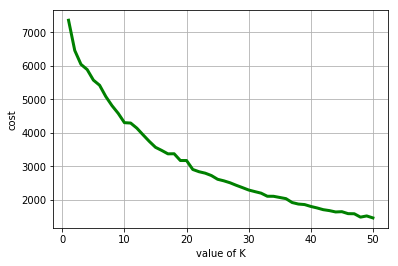

In [67]:
import matplotlib.pyplot as plt
cost=[]
for i in range(1,51):
    km=KMeans(n_clusters=i,random_state=0).fit(M_one)
    cost.append(km.inertia_)
    
plt.plot(range(1,51),cost,color='g',linewidth=3)
plt.xlabel('value of K')
plt.ylabel('cost')
plt.grid()
plt.show()    

In [68]:
# set number of clusters
Mclusters = 5

M_clustering = M_res.drop(["Neighbourhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=Mclusters, random_state=0).fit(M_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 0, 0, 1, 3, 0, 3, 2], dtype=int32)

In [69]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
M_merged = M_res.copy()
# add clustering labels
M_merged["Cluster Labels"] = kmeans.labels_

In [70]:
M_merged.rename(columns={"Neighbourhoods": "Neighbourhood"}, inplace=True)
M_merged.head()

,Neighbourhood,Restaurant,Cluster Labels
0,Aarey Milk Colony,0.012987,0
1,Agripada,0.064935,2
2,Altamount Road,0.041667,1
3,Amboli,0.000000,0
4,Amrut Nagar,0.010870,0


In [71]:
# merge M_grouped with Mumbai_data(Mdf) to add latitude/longitude for each neighborhood
M_merged = M_merged.join(Mdf.set_index("Neighbourhood"), on="Neighbourhood")

print(M_merged.shape)
M_merged.head() # check the last columns!

(93, 5)


,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
0,Aarey Milk Colony,0.012987,0,19.166150,72.859410
1,Agripada,0.064935,2,18.976280,72.826150
2,Altamount Road,0.041667,1,18.964338,72.807838
3,Amboli,0.000000,0,19.129060,72.846440
4,Amrut Nagar,0.010870,0,19.145160,72.846740


In [72]:
# sort the results by Cluster Labels
print(M_merged.shape)
M_merged.sort_values(["Cluster Labels"], inplace=True)
M_merged

(93, 5)


,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
0,Aarey Milk Colony,0.012987,0,19.166150,72.859410
27,D.N. Nagar,0.000000,0,19.125050,72.832480
28,Dagdi Chawl,0.000000,0,19.097820,72.844290
30,Dava Bazaar,0.000000,0,19.131400,72.926960
37,Four Bungalows,0.010000,0,19.126320,72.824330
38,Gorai,0.000000,0,19.240850,72.784110
40,Hindu colony,0.010000,0,19.019730,72.847370
80,Seven Bungalows,0.010000,0,19.131460,72.816460
45,Jogeshwari West,0.010000,0,19.141160,72.843320
49,Kanjurmarg,0.000000,0,19.131380,72.935680


## Finally, let's visualize the resulting clusters

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(Mclusters)
ys = [i+x+(i*x)**2 for i in range(Mclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [color.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M_merged['Latitude'], M_merged['Longitude'], M_merged['Neighbourhood'], M_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters¶

### Cluster 0

In [74]:
M_merged.loc[M_merged['Cluster Labels'] == 0]

,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
0,Aarey Milk Colony,0.012987,0,19.166150,72.859410
27,D.N. Nagar,0.000000,0,19.125050,72.832480
28,Dagdi Chawl,0.000000,0,19.097820,72.844290
30,Dava Bazaar,0.000000,0,19.131400,72.926960
37,Four Bungalows,0.010000,0,19.126320,72.824330
38,Gorai,0.000000,0,19.240850,72.784110
40,Hindu colony,0.010000,0,19.019730,72.847370
80,Seven Bungalows,0.010000,0,19.131460,72.816460
45,Jogeshwari West,0.010000,0,19.141160,72.843320
49,Kanjurmarg,0.000000,0,19.131380,72.935680


### Cluster1

In [75]:
M_merged.loc[M_merged['Cluster Labels'] == 1]

,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
24,Cuffe Parade,0.040000,1,18.912980,72.820500
65,Mira Road,0.043478,1,19.265705,72.870693
50,Kemps Corner,0.050000,1,18.964660,72.804530
42,I.C. Colony,0.044118,1,19.249170,72.850230
41,Hiranandani Gardens,0.050633,1,19.118970,72.906820
17,Chandivali,0.052083,1,19.110170,72.891710
5,Asalfa,0.040000,1,19.103010,72.899350
21,Chor Bazaar,0.040000,1,18.959950,72.829600
25,Cumbala Hill,0.043478,1,18.973940,72.805850
22,Churchgate,0.040000,1,18.936230,72.826820


### Cluster 2

In [76]:
M_merged.loc[M_merged['Cluster Labels'] == 2]

,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
66,Mumbai Central,0.060000,2,18.96972,72.81507
1,Agripada,0.064935,2,18.97628,72.82615
9,Bhandup,0.080000,2,19.14556,72.94856
43,Indian Institute of Technology Bombay campus,0.082353,2,19.12384,72.91117
39,Gowalia Tank,0.060000,2,18.96446,72.81117
12,Breach Candy,0.060000,2,18.96903,72.80384


### Cluster 3

In [77]:
M_merged.loc[M_merged['Cluster Labels'] == 3]

,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
74,Pali Naka,0.020000,3,19.061665,72.829771
71,Navy Nagar,0.033333,3,18.906030,72.815450
88,Vikhroli,0.030000,3,19.111090,72.927810
70,Nariman Point,0.030000,3,18.925910,72.818870
75,Pant Nagar,0.031915,3,19.086280,72.914970
68,Naigaon,0.020833,3,19.011850,72.845270
78,Prabhadevi,0.020000,3,19.014200,72.827760
79,Sahar,0.030000,3,19.102654,72.862580
82,Sunder Nagar,0.030000,3,19.014990,72.838450
83,Thakur village,0.033898,3,19.210200,72.875410


### Cluster 5

In [78]:
M_merged.loc[M_merged['Cluster Labels'] == 4]

,Neighbourhood,Restaurant,Cluster Labels,Latitude,Longitude
34,Dindoshi,0.111111,4,19.16861,72.88036
10,Bhayandar,0.125000,4,19.30743,72.85184


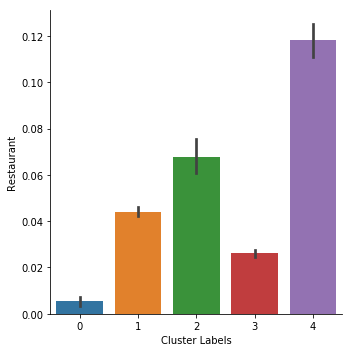

In [79]:
import seaborn as sns
sns.catplot(x='Cluster Labels', y='Restaurant', data=M_merged, kind='bar');

## Observation

Most of the Restaurants are concentrated in the central area of Mumbai city, with the highest number in cluster 4 and moderate number in cluster 3 and cluster 1.other hand, cluster 0 has very low number to totally no resturants in the neighborhoods.This represents a great opportunity and high potential areas to open new Resturants as there is very little to no competition from existing ones.
This project recommends property developers to capitalize on these findings to open new Restaurants in neighborhoods in cluster 0 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new Restauramts in neighborhoods in cluster 2 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 4 which already have high concentration of shopping malls and suffering from intense competition.